# TailCurve Basics

In [3]:
import chainladder as cl
import pandas as pd

This example demonstrates how the ``inverse_power`` curve generally produces more
conservative tail factors than the ``exponential`` fit.


In [1]:
clrd = cl.load_sample('clrd').groupby('LOB').sum()['CumPaidLoss']
cdf_ip = cl.TailCurve(curve='inverse_power').fit(clrd)
cdf_xp = cl.TailCurve(curve='exponential').fit(clrd)

result = pd.concat((cdf_ip.tail_.rename("Inverse Power"),
           cdf_xp.tail_.rename("Exponential")), axis=1)


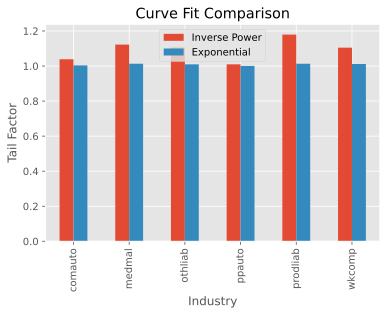

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

ax = result.plot(
    kind='bar', title='Curve Fit Comparison',
    xlabel='Industry', ylabel='Tail Factor');

In [4]:
from myst_nb import glue
glue("plot_tailcurve_compare", ax.get_figure(), display=False)